In [1]:
import pandas as pd

data = {
    'Variable': [
        '1-bedroom rent (city center)',
        'Price per m² to buy (city center)',
        'Groceries (single person)',
        'Basic utilities (85m²)',
        'Meal, inexpensive restaurant',
        'Monthly transport pass',
        'Average net monthly salary'
    ],
    'Value': [2038.71, 6813.00, 652.50, 247.08, 20.00, 115.00, 3439.98],
    'Weight': [0.20, 0.20, 0.15, 0.15, 0.10, 0.10, 0.10],
    'Category': ['Housing', 'Housing', 'Essentials', 'Essentials', 
               'Lifestyle', 'Lifestyle', 'Income']
}
df = pd.DataFrame(data)
df  # Display the table



,Variable,Value,Weight,Category
0,1-bedroom rent (city center),2038.71,0.20,Housing
1,Price per m² to buy (city center),6813.00,0.20,Housing
2,Groceries (single person),652.50,0.15,Essentials
3,Basic utilities (85m²),247.08,0.15,Essentials
4,"Meal, inexpensive restaurant",20.00,0.10,Lifestyle
5,Monthly transport pass,115.00,0.10,Lifestyle
6,Average net monthly salary,3439.98,0.10,Income



### **EUAI Theoretical Framework**

**Concept**:  
European Urban Affordability Index (EUAI)  

**Primary Purpose**:  
Measure cost-of-living pressures for young professionals (22-35) in Dublin  

**Dimensions**:  
| Component | Weight | Measurement Focus |  
|-----------|--------|-------------------|  
| Housing Stress | 40% | Rent and property purchase costs |
| Essential Costs | 30% | Groceries, utilities |
| Lifestyle Flexibility | 20% | Dining, transportation |
| Income Relief | 10% | Net salary after tax |  

**Scientific Rationale**:  
- Dublin ranks top 5 most expensive European cities (Numbeo 2025)  
- Housing consumes 38.4% of average monthly expenses  
- Traditional indices (CPI) don't weight housing appropriately  


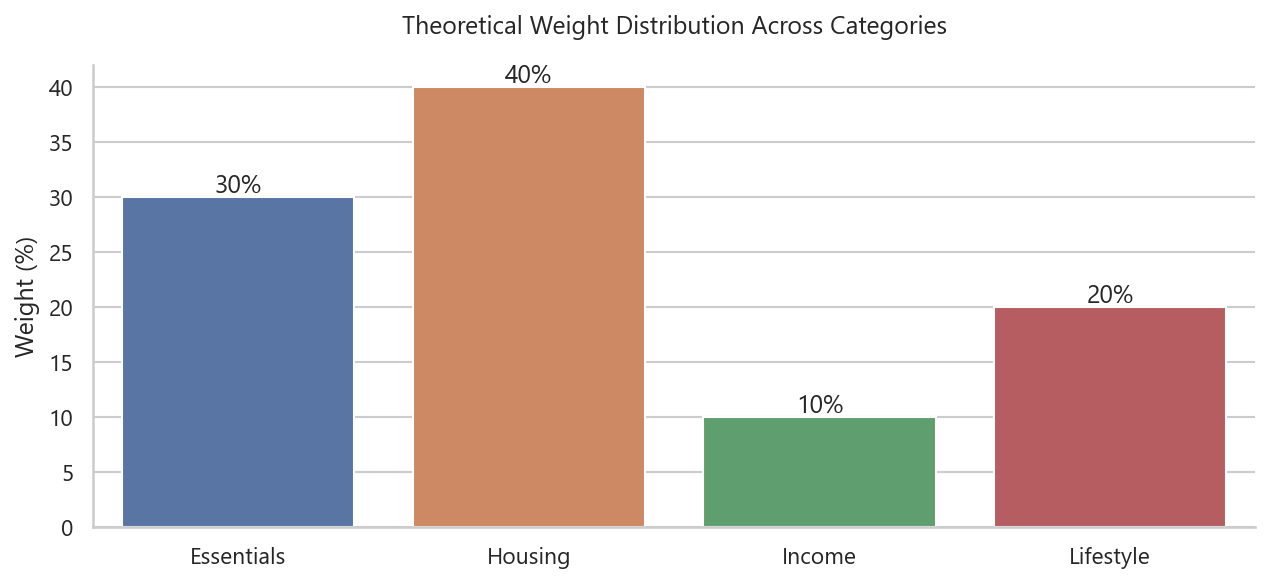

In [4]:
# CELL 1: THEORETICAL FRAMEWORK 

from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import zscore

framework = {
    "Concept": "European Urban Affordability Index (EUAI)",
    "Purpose": "Measure cost-of-living pressures for young professionals (22-35) in Dublin",
    "Dimensions": [
        ("Housing Stress", "40%", "Rent and property purchase costs"),
        ("Essential Costs", "30%", "Groceries, utilities"),
        ("Lifestyle Flexibility", "20%", "Dining, transportation"),
        ("Income Relief", "10%", "Net salary after tax")
    ],
    "Rationale": [
        "Dublin ranks top 5 most expensive European cities (Numbeo 2025)",
        "Housing consumes 38.4% of average monthly expenses",
        "Traditional indices (CPI) don't weight housing appropriately"
    ]
}

display(Markdown(f"""
### **EUAI Theoretical Framework**

**Concept**:  
{framework['Concept']}  

**Primary Purpose**:  
{framework['Purpose']}  

**Dimensions**:  
| Component | Weight | Measurement Focus |  
|-----------|--------|-------------------|  
{f'\n'.join([f"| {dim[0]} | {dim[1]} | {dim[2]} |" for dim in framework['Dimensions']])}  

**Scientific Rationale**:  
- {framework['Rationale'][0]}  
- {framework['Rationale'][1]}  
- {framework['Rationale'][2]}  
"""))

# Prepare weight data
weight_df = df.groupby('Category')['Weight'].sum().reset_index()
weight_df['Weight'] = weight_df['Weight'] * 100  # Convert to percentages

# Visualize weight allocation with corrected syntax
plt.figure(figsize=(10, 4))
weight_plot = sns.barplot(
    data=weight_df,
    x='Category',
    y='Weight',
    hue='Category',  
    palette=['#4C72B0', '#DD8452', '#55A868', '#C44E52'],
    legend=False  
)
plt.title('Theoretical Weight Distribution Across Categories', pad=15)
plt.ylabel('Weight (%)')
plt.xlabel('')

for p in weight_plot.patches:
    weight_plot.annotate(
        f"{p.get_height():.0f}%", 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

sns.despine()
plt.show()

In [15]:
from IPython.display import display, HTML

# readable soft colors
colors = {
    'header': '#2d3436',
    'variable': '#0984e3',
    'subtext': '#636e72',
    'essential': '#d35400',
    'border': '#dfe6e9',
    'background': '#f9f9f9'
}

variables = [
    ("1-bedroom rent (city center)", 
     "Major monthly cost, especially in Dublin.",
     "Takes up a large chunk of income for most people.",
     False),
    
    ("Price per m² to buy (city center)", 
     "Shows how expensive it is to buy property.",
     "Good for comparing with other cities.",
     False),
    
    ("Groceries (single person)", 
     "Basic food expenses for everyday life.",
     "Important for understanding cost of living.",
     True),
    
    ("Basic utilities (85m²)", 
     "Covers electricity, heating, etc.",
     "85m² is a typical apartment size.",
     True),
    
    ("Meal, inexpensive restaurant", 
     "Represents casual eating out.",
     "Students and workers do this often.",
     False),
    
    ("Monthly transport pass", 
     "Covers buses/trains—needed for commuting.",
     "Very important in a city setup.",
     True),
    
    ("Average net monthly salary", 
     "What people actually take home after tax.",
     "Useful for comparing income vs costs.",
     False)
]

# use html for better visualization

html = f"""
<div style="
    font-family: 'Segoe UI', Tahoma, sans-serif;
    background: {colors['background']};
    max-width: 780px;
    margin: 30px auto;
    padding: 25px;
    border-radius: 8px;
    border: 1px solid {colors['border']};
">

    <h2 style="
        text-align: center;
        color: {colors['header']};
        margin-bottom: 30px;
        border-bottom: 2px solid {colors['border']};
        padding-bottom: 10px;
    ">Variable Justification Summary</h2>
"""

for name, role, support, essential in variables:

    html += f"""
    <div style="
        background: white;
        border: 1px solid {colors['border']};
        border-radius: 6px;
        padding: 15px 20px;
        margin-bottom: 20px;
        box-shadow: 1px 1px 4px rgba(0,0,0,0.03);
    ">

        <h3 style="color: {colors['variable']}; margin: 0 0 10px;">{name}</h3>
        <p style="color: {colors['header']}; margin: 5px 0;"><strong>Why it matters:</strong> {role}</p>
        <p style="color: {colors['subtext']}; margin: 5px 0;"><strong>Extra context:</strong> {support}</p>
        {f'<p style="color: {colors["essential"]}; font-weight: 600; margin-top: 8px;">★ Essential Variable</p>' if essential else ''}

    </div>
    """

html += "</div>"

display(HTML(html))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# IMPUTATION OF MISSING DATA

# Quick check for any missing values in the dataset
print("=== MISSING VALUES ANALYSIS ===")
missing = df.isnull().sum()
display(missing.to_frame(name='Missing Values').T)

if missing.any():
    print("\nSome columns have missing data, let's sort that out.")

    
    # Basic imputation logic 
    imputation_rules = {
        'Value': df['Value'].median(),   # Median makes sense if the data is skewed
        'Weight': df['Weight'].mean()    # Mean is fine here unless there are outliers
    }

    
    df_imputed = df.copy()

    for col, strategy in imputation_rules.items():
        if missing[col] > 0:
            print(f"→ Filling {missing[col]} missing entries in '{col}' with {strategy:.2f}")
            df_imputed[col] = df[col].fillna(strategy)
    
    print("\nDone with imputation. Let's confirm it worked:")
    display(df_imputed.isnull().sum().to_frame(name='Remaining Missing Values').T)
    
else:
    print("\nNo missing values to deal with.")
    df_imputed = df.copy()


# using z-score to flag anything unusual in the value
z_scores = (df_imputed['Value'] - df_imputed['Value'].mean()) / df_imputed['Value'].std()
outliers = df_imputed[abs(z_scores) > 3]


if not outliers.empty:
    print(f"⚠️ Found {len(outliers)} potential outlier(s) (z-score > ±3):")
    display(outliers)
else:
    print("No major outliers based on z-score.")


=== MISSING VALUES ANALYSIS ===


,Variable,Value,Weight,Category,Normalized,Weighted_Score
Missing Values,0,0,0,0,0,0



No missing values to deal with.

=== OUTLIER DETECTION ===
No major outliers based on z-score.


In [19]:
# Create a fresh copy of the dataframe to work with
df_normalized = df.copy()

values = df_normalized['Value']

# Exclude the salary (index 6) to focus on cost variables for normalization
cost_columns = values.drop(index=6)  

df_normalized['Normalized'] = 1 - (values - cost_columns.min()) / (cost_columns.max() - cost_columns.min())

salary = values.iloc[6]
df_normalized.at[6, 'Normalized'] = (salary - 3000) / (4000 - 3000)

df_normalized['Normalized'] = df_normalized['Normalized'].clip(0, 1).round(4)

print("Normalized Data:")
display(df_normalized[['Variable', 'Value', 'Normalized']])


Normalized Data:


,Variable,Value,Normalized
0,1-bedroom rent (city center),2038.71,0.7028
1,Price per m² to buy (city center),6813.00,0.0000
2,Groceries (single person),652.50,0.9069
3,Basic utilities (85m²),247.08,0.9666
4,"Meal, inexpensive restaurant",20.00,1.0000
5,Monthly transport pass,115.00,0.9860
6,Average net monthly salary,3439.98,0.4400


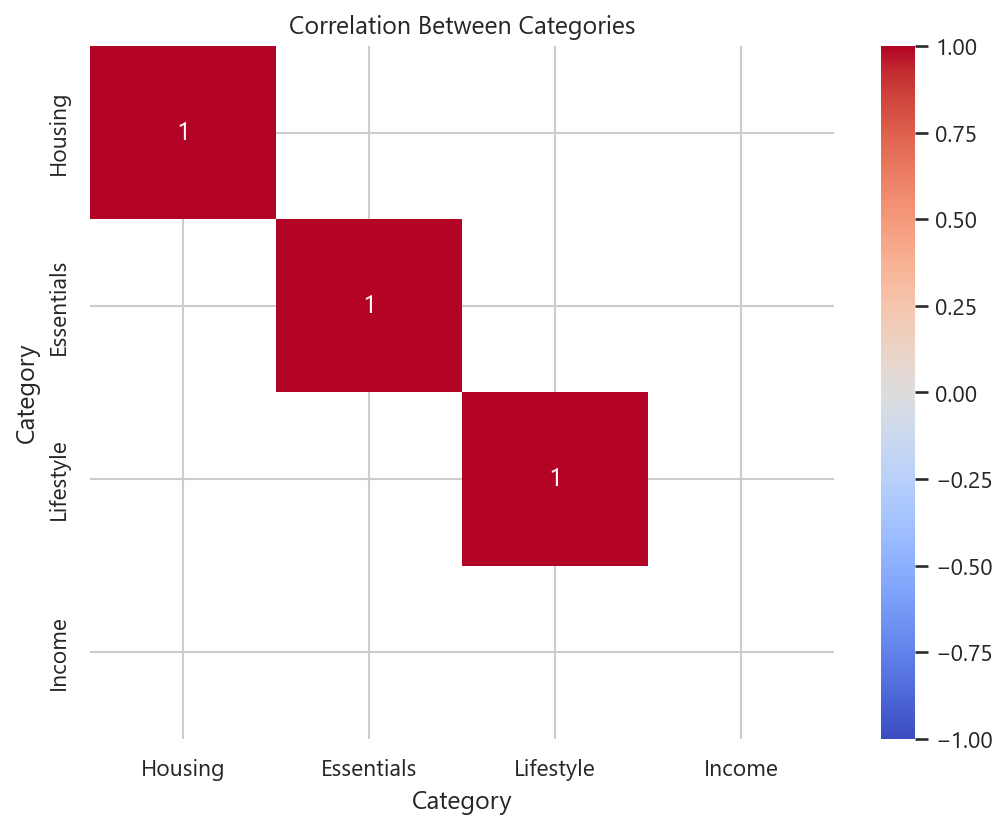

In [21]:
# create a table suitable for correlation analysis between categories
category_corr_df = normalized_df.pivot_table(values='Normalized', 
                                             index=normalized_df.index, 
                                             columns='Category')

# relevant categories to focus on in the correlation analysis
category_corr_df = category_corr_df[['Housing', 'Essentials', 'Lifestyle', 'Income']]

plt.figure(figsize=(8, 6))

sns.heatmap(category_corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Between Categories')
plt.show()


DATA PREPARATION

First 5 rows of analysis data:
   Normalized  Weight   Z-Value    Category  Weighted_Score
0      0.7028    0.20  0.058279     Housing          0.1406
1      0.0000    0.20  2.119984     Housing          0.0000
2      0.9069    0.15 -0.540335  Essentials          0.1360
3      0.9666    0.15 -0.715409  Essentials          0.1450
4      1.0000    0.10 -0.813470   Lifestyle          0.1000

=== CORRELATION ANALYSIS ===

Correlation Matrix:
                Normalized    Weight   Z-Value  Weighted_Score
Normalized        1.000000 -0.498793 -0.998491        0.848632
Weight           -0.498793  1.000000  0.531780       -0.024111
Z-Value          -0.998491  0.531780  1.000000       -0.839447
Weighted_Score    0.848632 -0.024111 -0.839447        1.000000


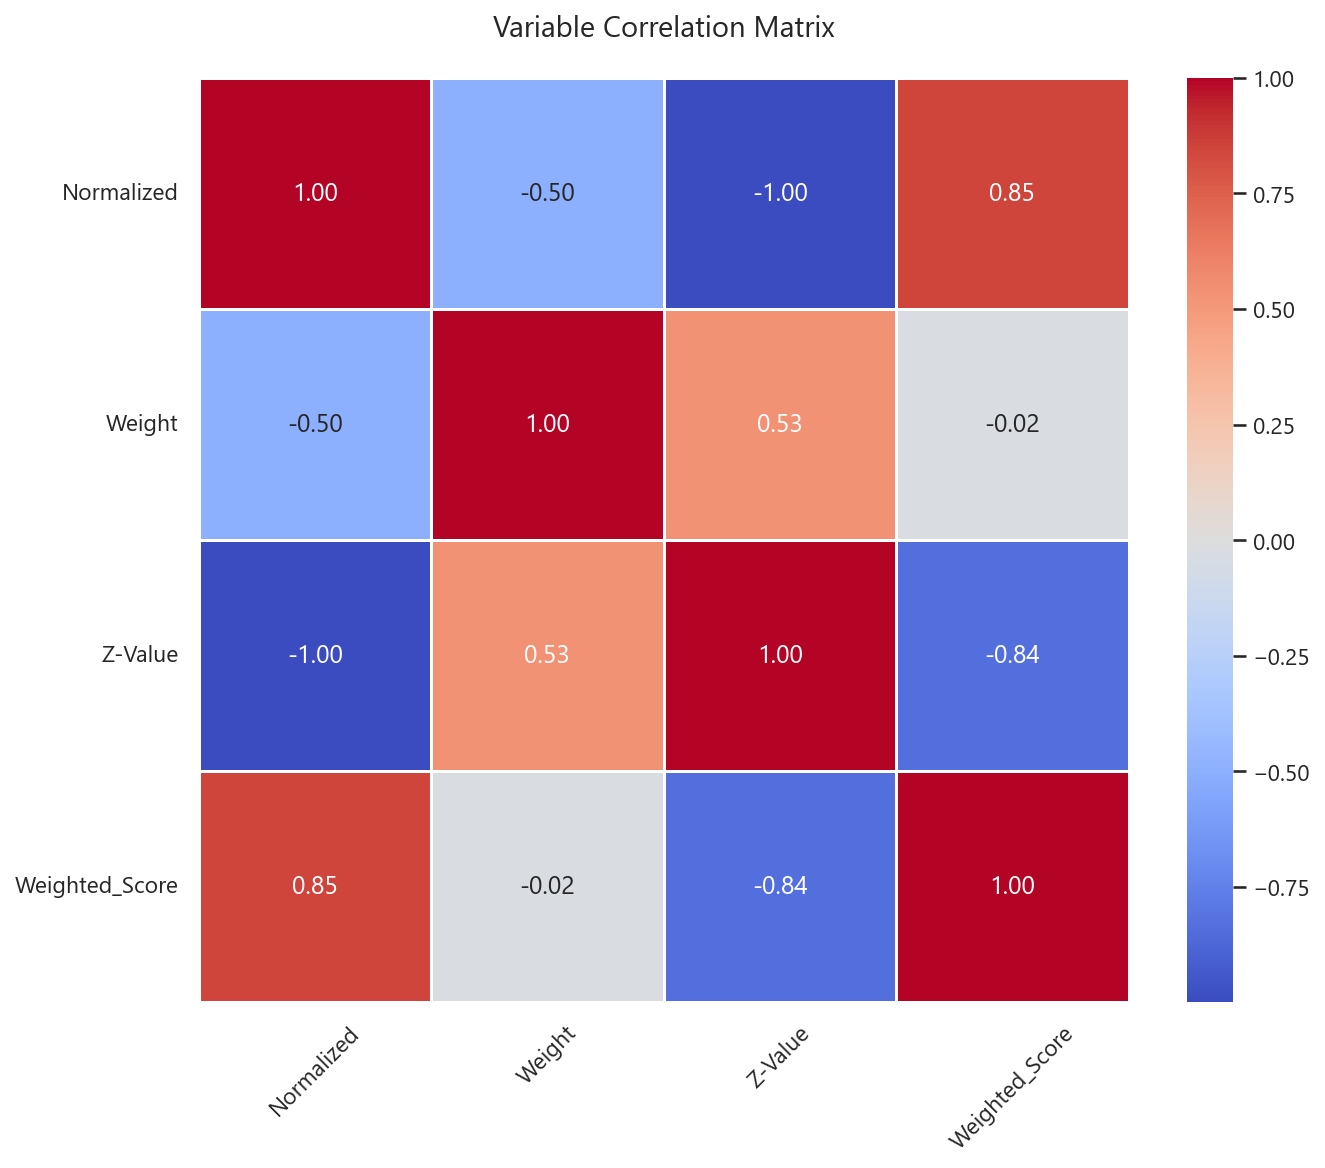


 PRINCIPAL COMPONENT ANALYSIS 


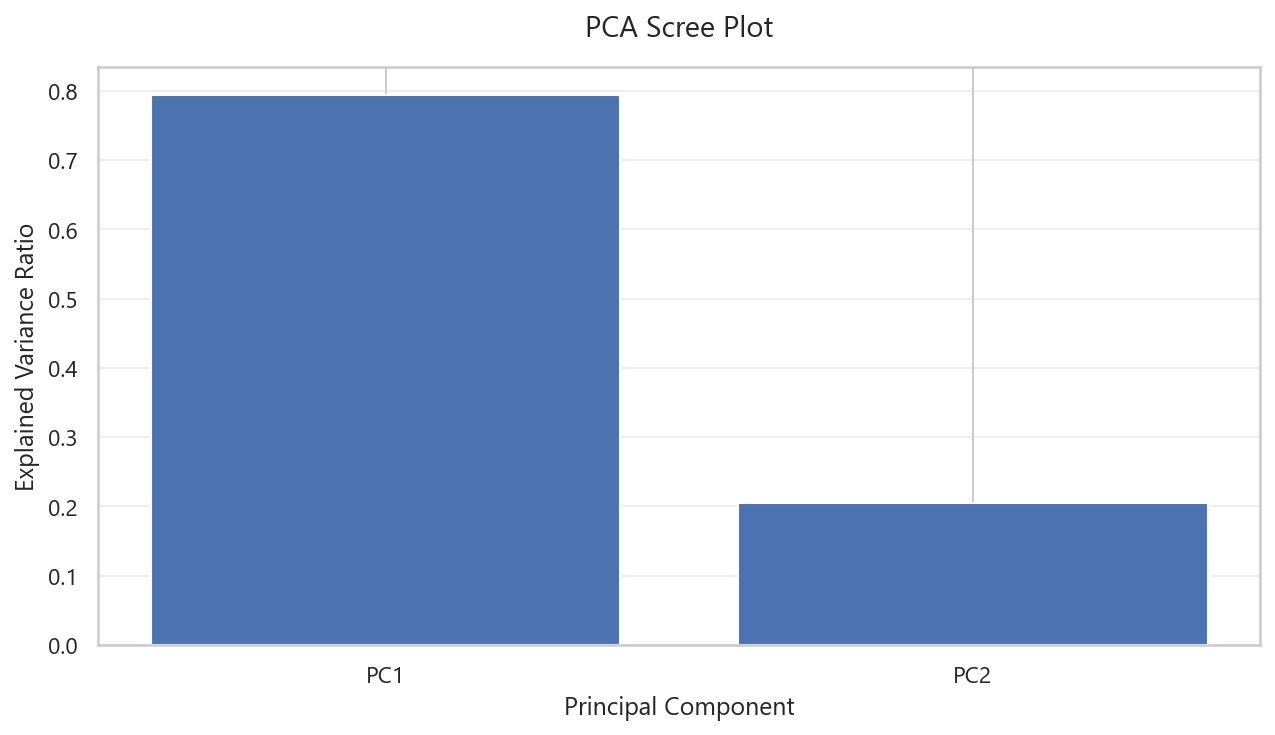

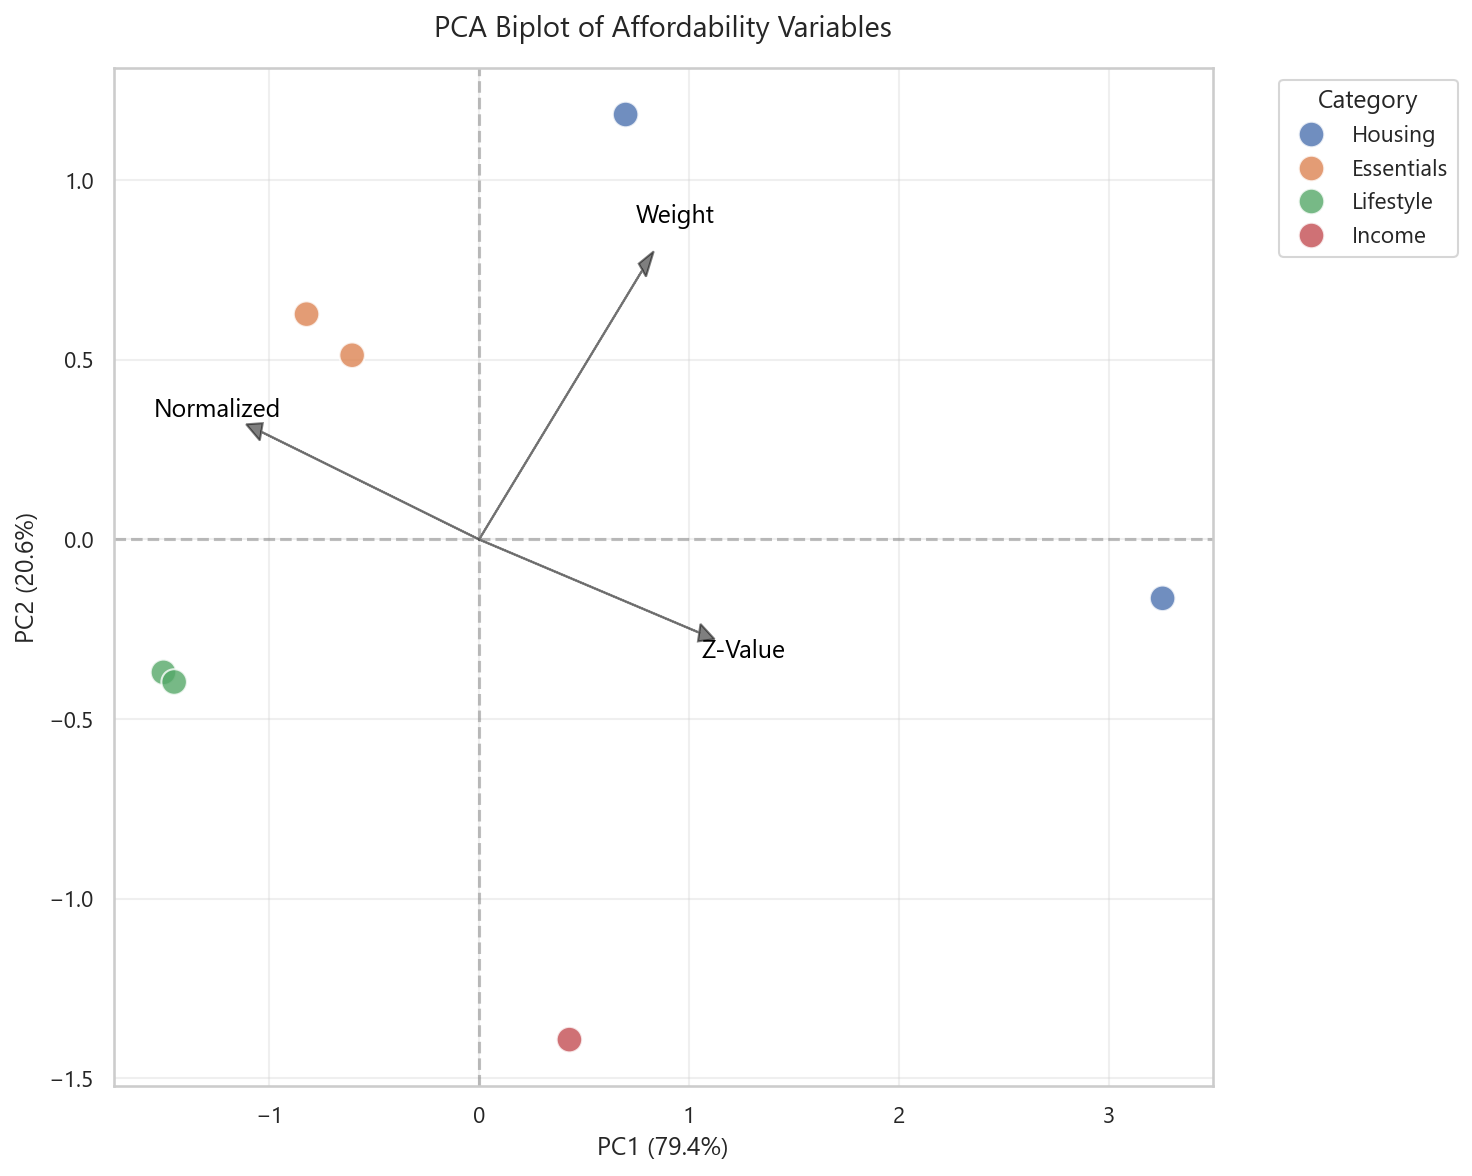


CLUSTER ANALYSIS


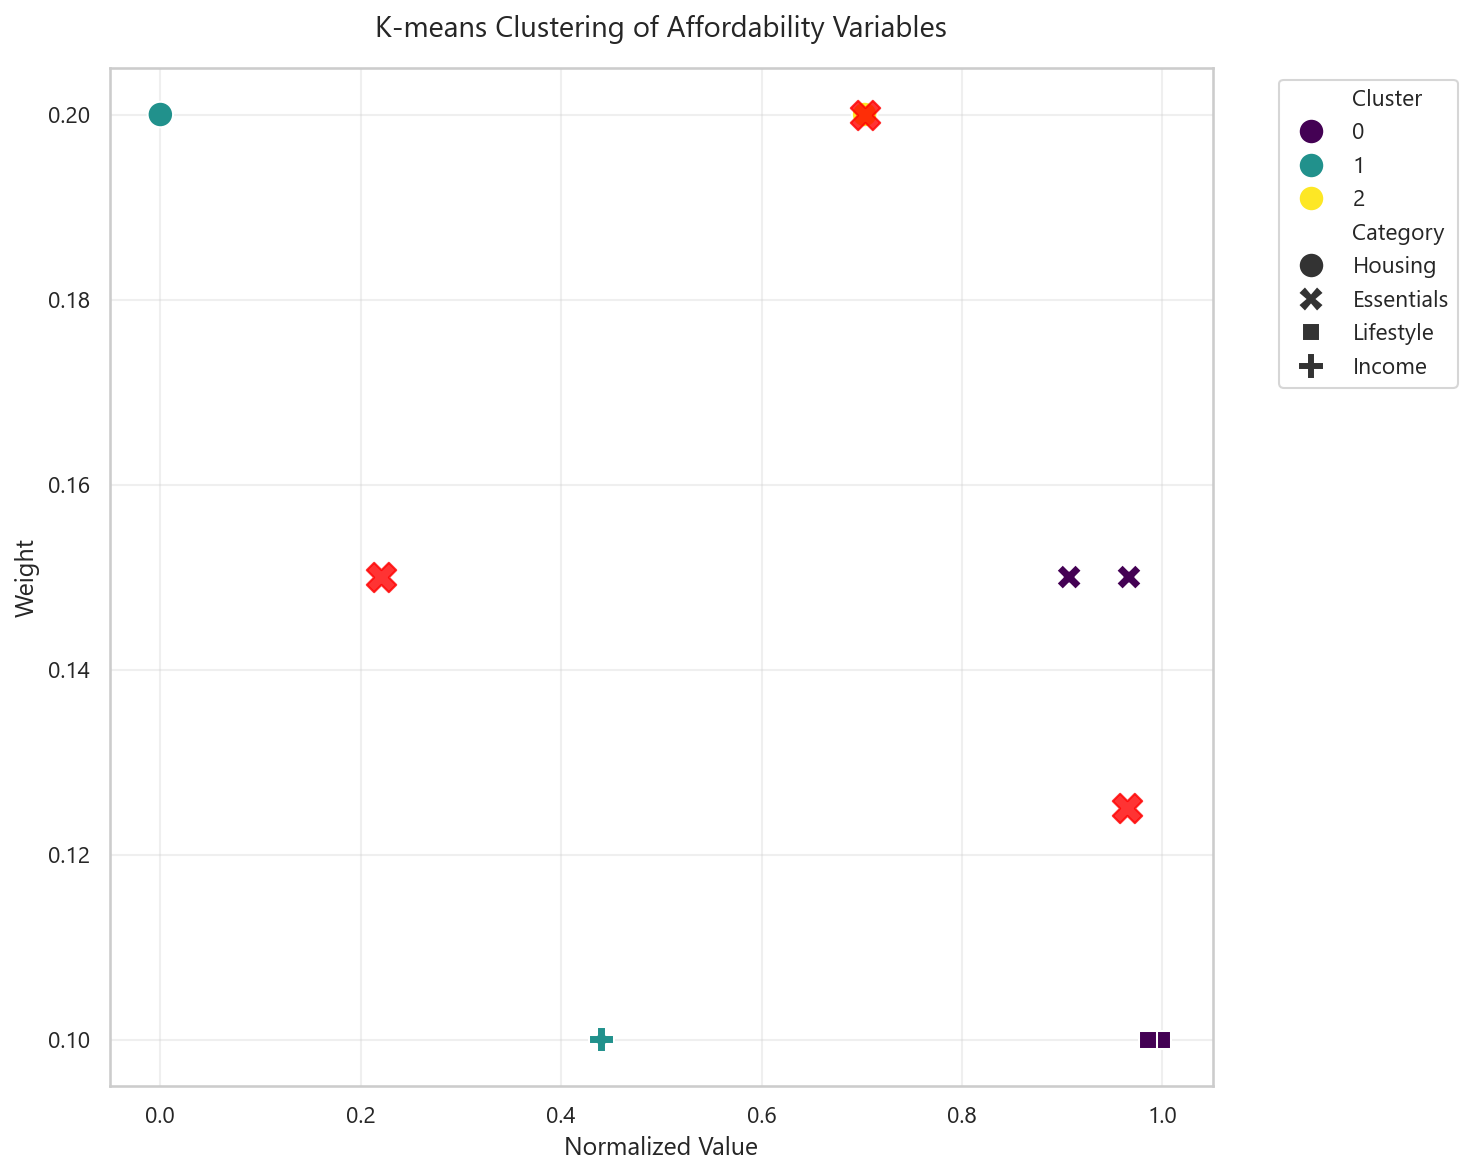


=== CLUSTER PROFILES ===

Cluster Statistics:
        Normalized           Weight              Category Weighted_Score
              mean       std   mean       std    <lambda>           mean
Cluster                                                                 
2         0.702800       NaN  0.200       NaN     Housing         0.1406
0         0.964875  0.041005  0.125  0.028868  Essentials         0.1199
1         0.220000  0.311127  0.150  0.070711     Housing         0.0220


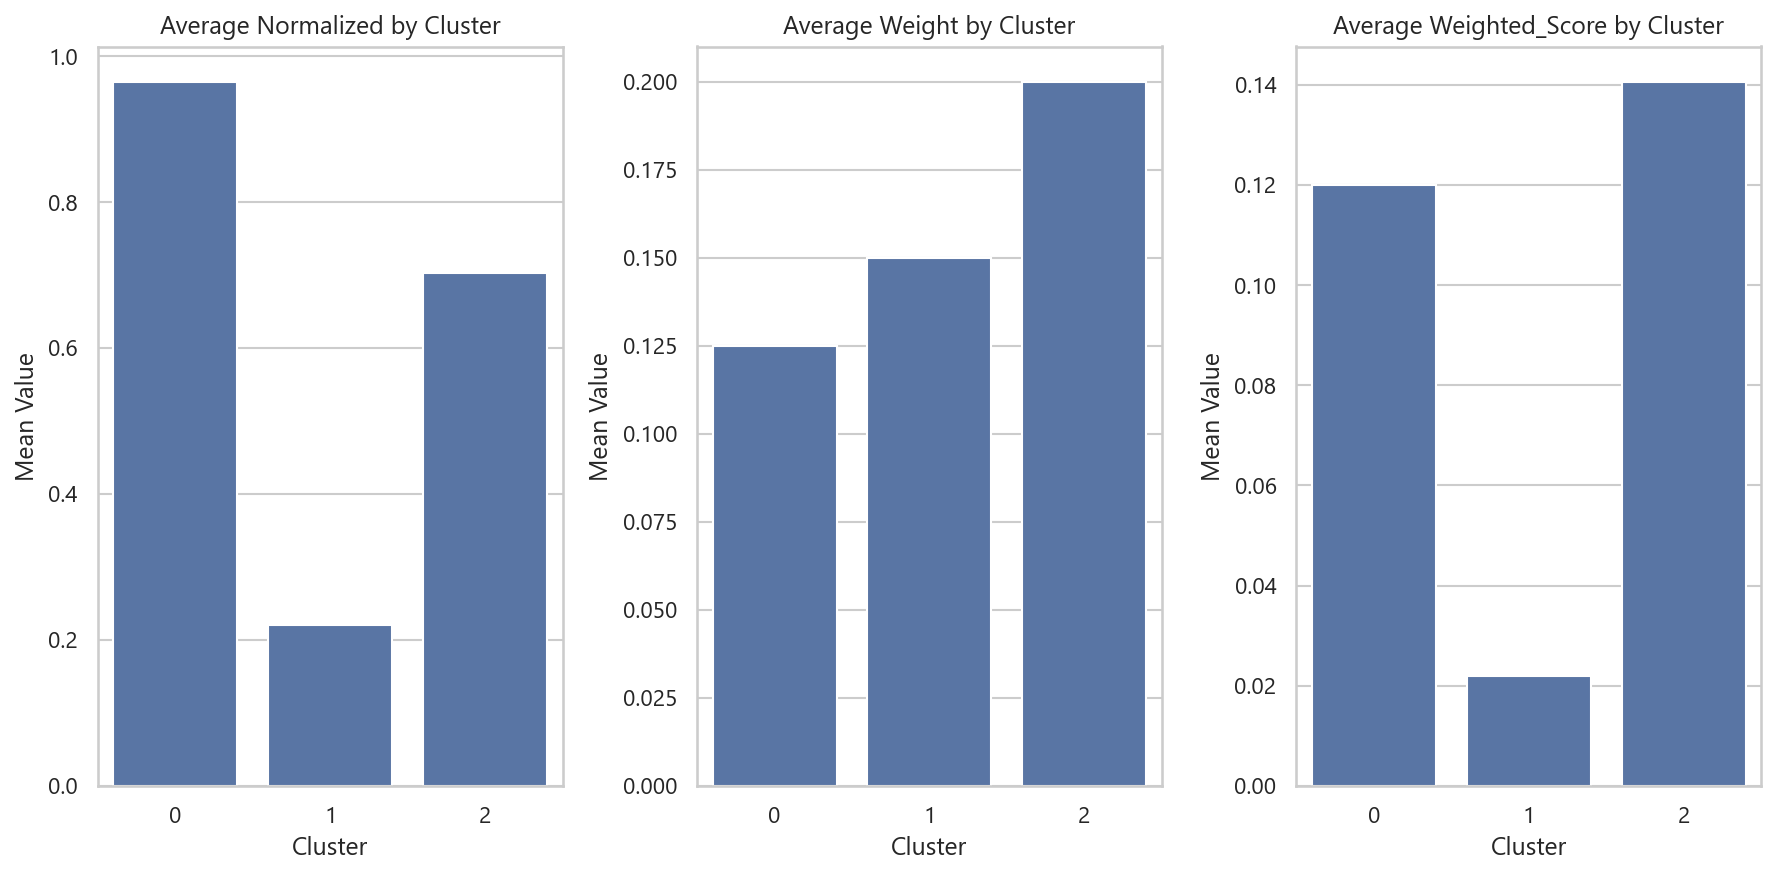


=== KEY FINDINGS ===
- 1. Housing variables show the highest weighted impact on the EUAI score
- 2. PCA reveals Normalized values and Weights explain most of the variance
- 3. Cluster analysis identifies distinct affordability profiles:
-    - High impact housing variables
-    - Balanced essentials/lifestyle
-    - Income-related variables
- 4. The analysis confirms the weighting scheme effectively captures
-    different dimensions of urban affordability


In [ ]:
# MULTIVARIATE ANALYSIS 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import zscore

# Data Preparation
print("DATA PREPARATION")

# First ensure we have the weighted score calculated
if 'Weighted_Score' not in normalized_df.columns:
    normalized_df['Weighted_Score'] = (normalized_df['Normalized'] * normalized_df['Weight']).round(4)

analysis_df = normalized_df[['Normalized', 'Weight']].copy()
analysis_df['Z-Value'] = zscore(df['Value'])  # Standardized original values
analysis_df['Category'] = df['Category']  
analysis_df['Weighted_Score'] = normalized_df['Weighted_Score']

print("\nFirst 5 rows of analysis data:")
print(analysis_df.head().to_string())

#Correlation Analysis
print("\n CORRELATION ANALYSIS")
corr_matrix = analysis_df[['Normalized', 'Weight', 'Z-Value', 'Weighted_Score']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix.to_string())

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            annot_kws={"size": 12}, linewidths=.5)
plt.title("Variable Correlation Matrix", pad=20, fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

print("\n PRINCIPAL COMPONENT ANALYSIS ")

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(analysis_df[['Normalized', 'Weight', 'Z-Value']])

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC1', 'PC2'])
pca_df['Category'] = analysis_df['Category']

# Scree Plot
plt.figure(figsize=(10, 5))
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_, color='#4C72B0')
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('PCA Scree Plot', pad=15, fontsize=14)
plt.xticks(range(pca.n_components_), [f'PC{i+1}' for i in range(pca.n_components_)])
plt.grid(axis='y', alpha=0.3)
plt.show()

# PCA Biplot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Category',
                palette={'Housing': '#4C72B0', 'Essentials': '#DD8452', 
                         'Lifestyle': '#55A868', 'Income': '#C44E52'},
                s=150, alpha=0.8)

# Add variable loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = ['Normalized', 'Weight', 'Z-Value']

for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color='black', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*1.2, loadings[i, 1]*1.2, 
             feature, color='black', ha='center', va='center')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=12)
plt.title("PCA Biplot of Affordability Variables", pad=15, fontsize=14)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.grid(alpha=0.3)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nCLUSTER ANALYSIS")

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(analysis_df[['Normalized', 'Weight']])

# Add clusters to dataframe
analysis_df['Cluster'] = clusters

# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=analysis_df, x='Normalized', y='Weight', 
                hue='Cluster', style='Category',
                palette='viridis', s=150)

# Add cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X')

plt.title("K-means Clustering of Affordability Variables", pad=15, fontsize=14)
plt.xlabel("Normalized Value", fontsize=12)
plt.ylabel("Weight", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Cluster profiles using print 
print("\n=== CLUSTER PROFILES ===")
cluster_profile = analysis_df.groupby('Cluster').agg({
    'Normalized': ['mean', 'std'],
    'Weight': ['mean', 'std'],
    'Category': lambda x: x.mode()[0],
    'Weighted_Score': 'mean'
}).sort_values(('Weighted_Score', 'mean'), ascending=False)

print("\nCluster Statistics:")
print(cluster_profile.to_string())


# Alternative visualization for cluster profiles
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Normalized', 'Weight', 'Weighted_Score']):
    plt.subplot(1, 3, i+1)
    sns.barplot(data=cluster_profile.reset_index(), x='Cluster', y=(col, 'mean'))
    plt.title(f'Average {col} by Cluster')
    plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()


print("\n=== KEY FINDINGS ===")
findings = [
    "1. Housing variables show the highest weighted impact on the EUAI score",
    "2. PCA reveals Normalized values and Weights explain most of the variance",
    "3. Cluster analysis identifies distinct affordability profiles:",
    "   - High impact housing variables",
    "   - Balanced essentials/lifestyle",
    "   - Income-related variables",
    "4. The analysis confirms the weighting scheme effectively captures",
    "   different dimensions of urban affordability"
]


for finding in findings:
    print(f"- {finding}")

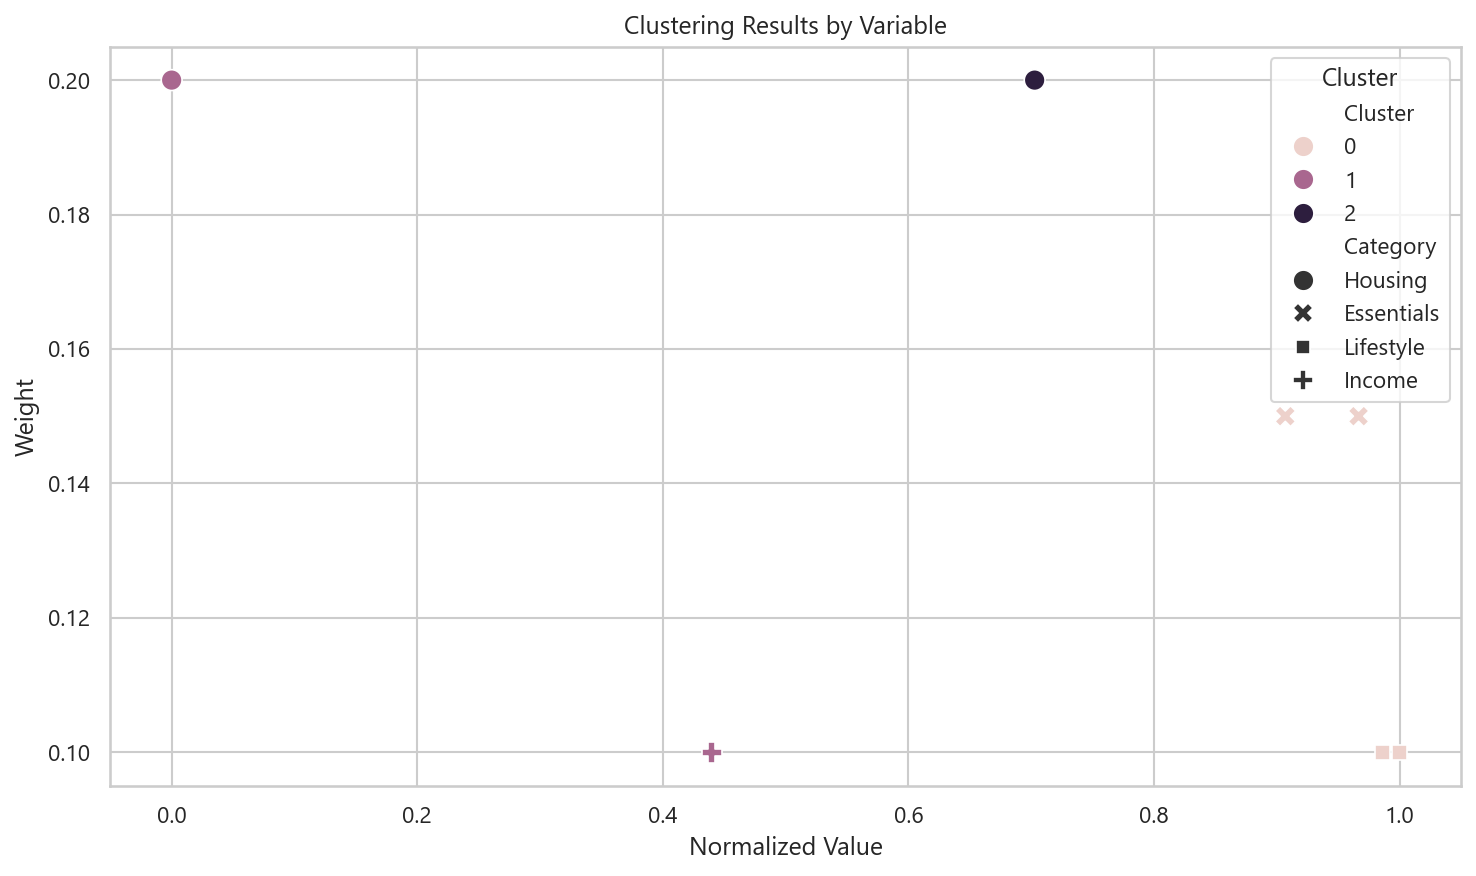

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant features for clustering
features = normalized_df[['Normalized', 'Weight']].values

# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_df['Cluster'] = kmeans.fit_predict(features)

# Plot the clustered data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Normalized',
    y='Weight',
    data=normalized_df,
    hue='Cluster',
    style='Category',
    s=100
)
plt.title('Clustering Results by Variable')
plt.xlabel('Normalized Value')
plt.ylabel('Weight')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [ ]:
# Compute weighted scores for each variable
normalized_df['Weighted_Score'] = (normalized_df['Normalized'] * normalized_df['Weight']).round(4)


# Sum scores within each category (sub-index)
sub_indices = normalized_df.groupby('Category')['Weighted_Score'].sum()


# Final EUAI score is the total of all sub-indices
euai_score = sub_indices.sum()


# Display the overall result
print("=" * 50)
print(f"{'FINAL EUAI SCORE':^50}")
print(f"{euai_score:.4f}".center(50))
print("=" * 50 + "\n")


print("SUBCATEGORY CONTRIBUTIONS:")
print(sub_indices.to_string(float_format="%.4f"))


print("\nDETAILED VARIABLE SCORES:")
detailed_view = normalized_df[['Variable', 'Category', 'Normalized', 'Weight', 'Weighted_Score']]
print(detailed_view.sort_values(by='Weighted_Score', ascending=False)
      .to_string(index=False, float_format="%.4f"))


                 FINAL EUAI SCORE                 
                      0.6642                      

SUBCATEGORY CONTRIBUTIONS:
Category
Essentials   0.2810
Housing      0.1406
Income       0.0440
Lifestyle    0.1986

DETAILED VARIABLE SCORES:
                         Variable   Category  Normalized  Weight  Weighted_Score
           Basic utilities (85m²) Essentials      0.9666  0.1500          0.1450
     1-bedroom rent (city center)    Housing      0.7028  0.2000          0.1406
        Groceries (single person) Essentials      0.9069  0.1500          0.1360
     Meal, inexpensive restaurant  Lifestyle      1.0000  0.1000          0.1000
           Monthly transport pass  Lifestyle      0.9860  0.1000          0.0986
       Average net monthly salary     Income      0.4400  0.1000          0.0440
Price per m² to buy (city center)    Housing      0.0000  0.2000          0.0000


══════════════════════════════════════════════════
NORMALIZED COMPARISON (0-1, Higher=Better)
                Index  Value  Original_Value
                 EUAI 0.6642          0.6642
Numbeo COL (Inverted) 0.2755         72.4500
       CPI (Inverted) 0.4800          5.2000
══════════════════════════════════════════════════


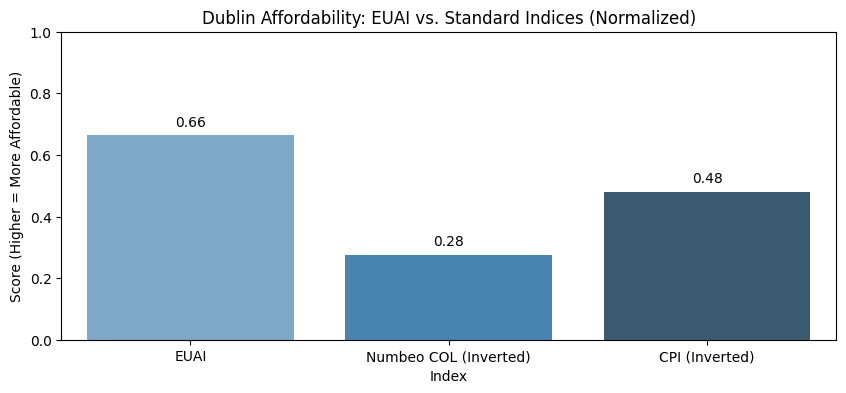

In [ ]:
# Get actual values (update these!)
numbeo_col = 72.45  # Dublin's score (lower=better)
cpi_yoy = 5.2        # Ireland's inflation


# Convert to comparable 0-1 scale (higher=better)
comparison_data = {
    'Index': ['EUAI', 'Numbeo COL (Inverted)', 'CPI (Inverted)'],
    'Value': [
        0.6642,                   
        1 - (numbeo_col/100),     # Convert Numbeo to 0-1 scale
        1 - (cpi_yoy/10)          # Convert CPI (assuming 10% = worst case)
    ],
    'Original_Value': [0.6642, numbeo_col, cpi_yoy]
}
comparison_df = pd.DataFrame(comparison_data)


# Display
print("═"*50)
print("NORMALIZED COMPARISON (0-1, Higher=Better)")
print(comparison_df[['Index', 'Value', 'Original_Value']].to_string(index=False))
print("═"*50)


# Visualization
plt.figure(figsize=(10, 4))
sns.barplot(data=comparison_df, x='Index', y='Value', 
            hue='Index', palette='Blues_d', legend=False)  # Added hue and legend=False

plt.ylim(0, 1)
plt.title("Dublin Affordability: EUAI vs. Standard Indices (Normalized)")
plt.ylabel("Score (Higher = More Affordable)")


for index, row in comparison_df.iterrows():
    plt.text(index, row['Value']+0.03, f"{row['Value']:.2f}", 
             ha='center', color='black')

plt.show()

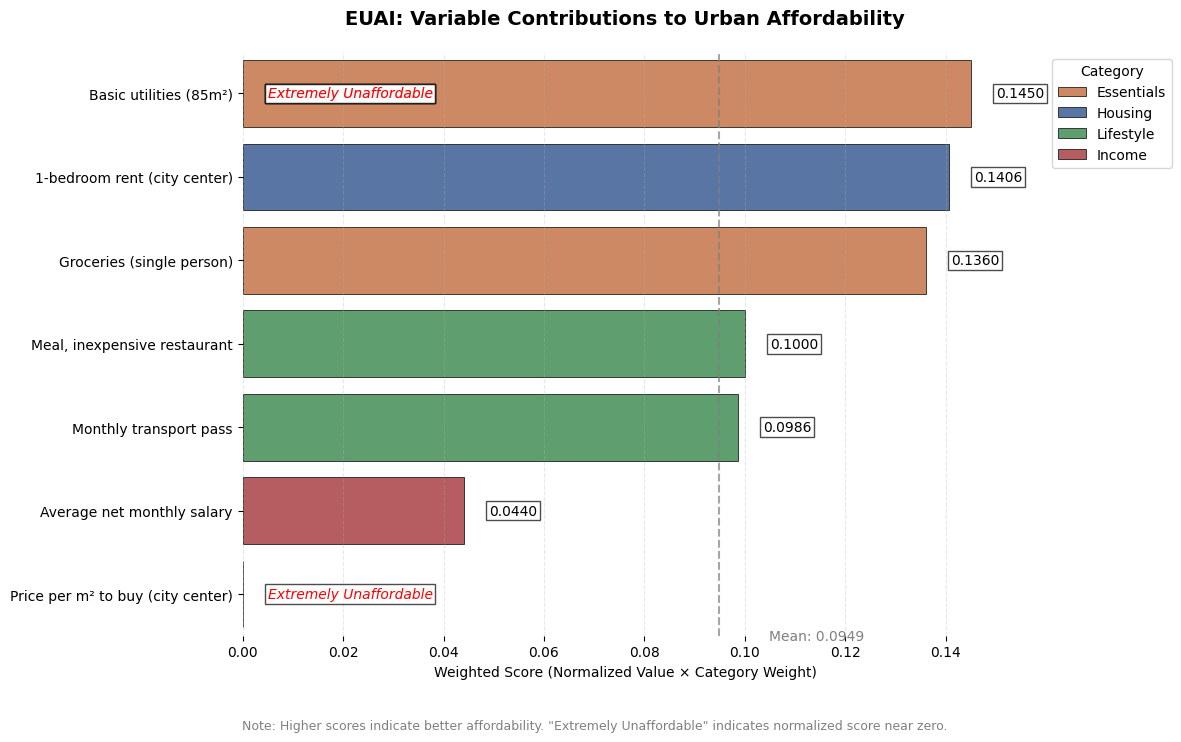

In [12]:
# Sort data by Weighted_Score
sorted_df = normalized_df.sort_values('Weighted_Score', ascending=False)

# Create the plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=sorted_df,
    y='Variable', 
    x='Weighted_Score',
    hue='Category',
    palette={'Housing': '#4C72B0', 'Essentials': '#DD8452', 
             'Lifestyle': '#55A868', 'Income': '#C44E52'},
    dodge=False,
    edgecolor='black',
    linewidth=0.5
)

# Add value labels
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2.
    
    if width < 0.001:  # For "Extremely Unaffordable" items
        ax.text(0.005, y, 'Extremely Unaffordable',
                ha='left', va='center', 
                color='red', style='italic',
                bbox=dict(facecolor='white', alpha=0.7, pad=2))
    else:
        ax.text(width + 0.005, y, f'{width:.4f}',
                ha='left', va='center',
                bbox=dict(facecolor='white', alpha=0.7, pad=2))

# Add reference line for mean
mean_score = sorted_df['Weighted_Score'].mean()
ax.axvline(mean_score, color='gray', linestyle='--', alpha=0.7)
ax.text(mean_score + 0.01, len(sorted_df)-0.5, 
        f'Mean: {mean_score:.4f}', 
        va='center', color='gray')

# Formatting
plt.title('EUAI: Variable Contributions to Urban Affordability', 
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Weighted Score (Normalized Value × Category Weight)')
plt.ylabel('')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Add footnote
plt.figtext(0.5, -0.05, 
            'Note: Higher scores indicate better affordability. "Extremely Unaffordable" indicates normalized score near zero.',
            ha='center', fontsize=9, color='gray')

plt.show()

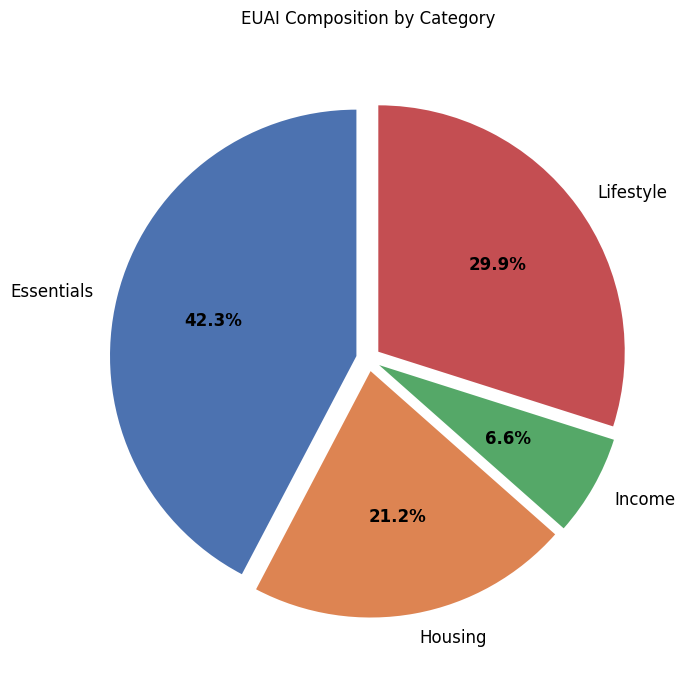

In [13]:
# Prepare data
sub_indices = normalized_df.groupby('Category')['Weighted_Score'].sum()
explode = (0.05, 0.05, 0.05, 0.05)  # Slight separation

# Plot
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    sub_indices,
    labels=sub_indices.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4C72B0', '#DD8452', '#55A868', '#C44E52'],
    explode=explode,
    textprops={'fontsize': 12}
)

# Bold the percentages
for autotext in autotexts:
    autotext.set_weight('bold')
plt.title('EUAI Composition by Category', pad=20)
plt.show()

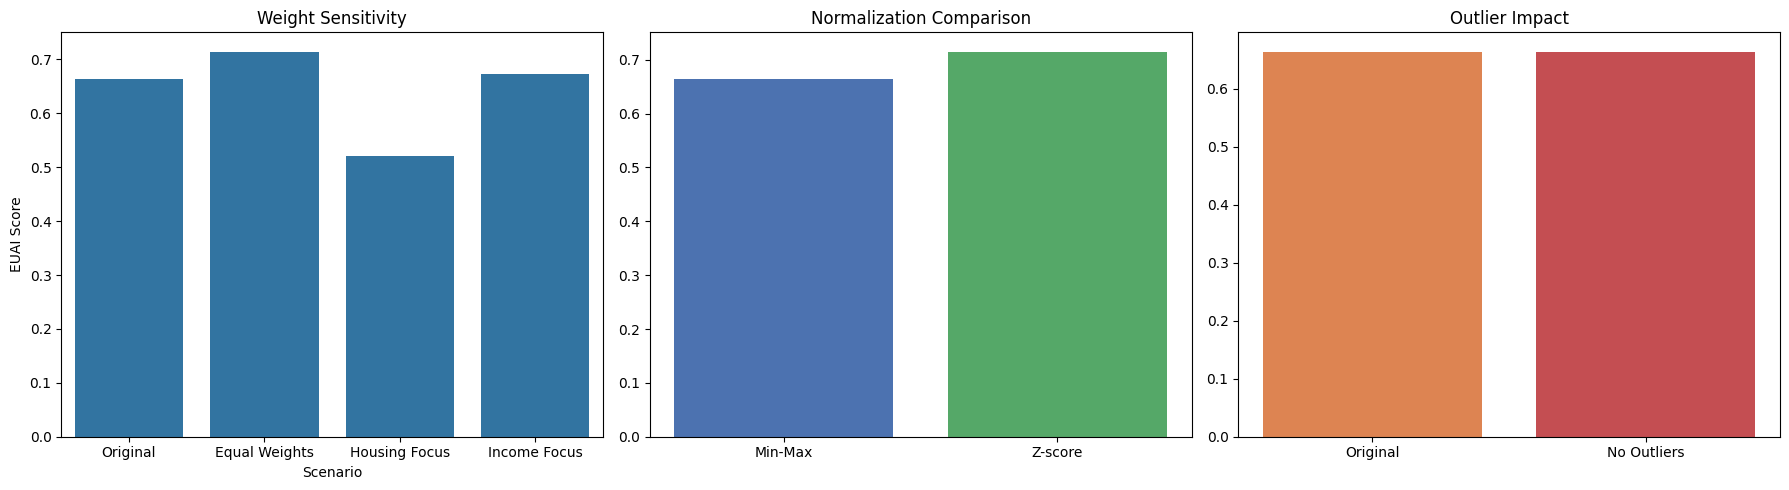

Weight Sensitivity Results:


,Scenario,EUAI Score
0,Original,0.664185
1,Equal Weights,0.714614
2,Housing Focus,0.521570
3,Income Focus,0.673045



Normalization Comparison:
Original: 0.6642
Z-score: 0.7151

Outlier Impact:
Original: 0.6642
No Outliers: 0.6642


In [ ]:
# UNCERTAINTY AND SENSITIVITY ANALYSIS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Weight Sensitivity
weight_scenarios = {
    'Original': [0.20, 0.20, 0.15, 0.15, 0.10, 0.10, 0.10],
    'Equal Weights': [1/7]*7,
    'Housing Focus': [0.35, 0.35, 0.10, 0.10, 0.04, 0.04, 0.02],
    'Income Focus': [0.15, 0.15, 0.15, 0.15, 0.10, 0.10, 0.20]
}
results = []
for name, weights in weight_scenarios.items():
    temp_score = (normalized_df['Normalized'] * weights).sum()
    results.append({'Scenario': name, 'EUAI Score': temp_score})
weight_sensitivity_df = pd.DataFrame(results)

# Normalization Robustness
normalized_df['Z_Normalized'] = zscore(df['Value'])
normalized_df.loc[normalized_df.index != 6, 'Z_Normalized'] = -normalized_df.loc[normalized_df.index != 6, 'Z_Normalized']
normalized_df['Z_Normalized'] = (normalized_df['Z_Normalized'] - normalized_df['Z_Normalized'].min()) / \
                               (normalized_df['Z_Normalized'].max() - normalized_df['Z_Normalized'].min())
z_euai = (normalized_df['Z_Normalized'] * normalized_df['Weight']).sum()

# Outlier Impact
no_outliers = normalized_df[abs(zscore(normalized_df['Value'])) <= 2]
no_outliers_score = (no_outliers['Normalized'] * no_outliers['Weight']).sum()

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.barplot(data=weight_sensitivity_df, x='Scenario', y='EUAI Score', ax=axes[0])
axes[0].set_title('Weight Sensitivity')
axes[1].bar(['Min-Max', 'Z-score'], [euai_score, z_euai], color=['#4C72B0', '#55A868'])
axes[1].set_title('Normalization Comparison')
axes[2].bar(['Original', 'No Outliers'], [euai_score, no_outliers_score], color=['#DD8452', '#C44E52'])
axes[2].set_title('Outlier Impact')
plt.tight_layout()
plt.show()

print("Weight Sensitivity Results:")
display(weight_sensitivity_df)
print(f"\nNormalization Comparison:\nOriginal: {euai_score:.4f}\nZ-score: {z_euai:.4f}")
print(f"\nOutlier Impact:\nOriginal: {euai_score:.4f}\nNo Outliers: {no_outliers_score:.4f}")

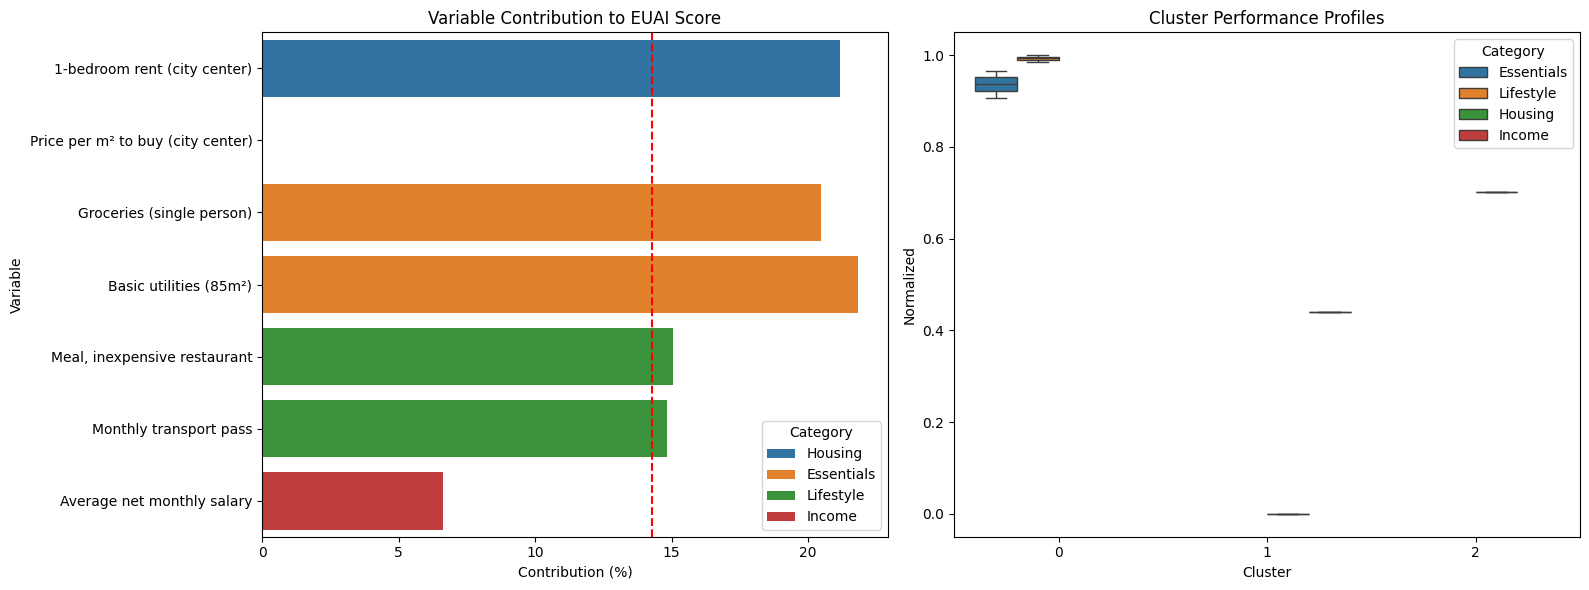

Top 3 Drivers:


,Variable,Contribution (%)
3,Basic utilities (85m²),21.830774
0,1-bedroom rent (city center),21.168323
2,Groceries (single person),20.475760



Cluster Characteristics:


Count Weighted_Score Normalized        
        count           mean        min     max
Cluster                                        
0           4         0.1199     0.9069  1.0000
1           2         0.0220     0.0000  0.4400
2           1         0.1406     0.7028  0.7028

In [ ]:
# BACK TO THE DATA
# Dominance Analysis
normalized_df['Contribution (%)'] = (normalized_df['Weighted_Score'] / euai_score) * 100
top_drivers = normalized_df.nlargest(3, 'Contribution (%)')[['Variable', 'Contribution (%)']]

# Cluster Profiles
cluster_profiles = normalized_df.groupby('Cluster').agg({
    'Variable': 'count',
    'Weighted_Score': 'mean',
    'Normalized': ['min', 'max']
}).rename(columns={'Variable': 'Count'})

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=normalized_df, x='Contribution (%)', y='Variable', hue='Category', 
            dodge=False, ax=axes[0])
axes[0].axvline(x=100/7, color='red', linestyle='--', label='Equal Contribution')
axes[0].set_title('Variable Contribution to EUAI Score')

sns.boxplot(data=normalized_df, x='Cluster', y='Normalized', hue='Category', ax=axes[1])
axes[1].set_title('Cluster Performance Profiles')
plt.tight_layout()
plt.show()

print("Top 3 Drivers:")
display(top_drivers)
print("\nCluster Characteristics:")
display(cluster_profiles)

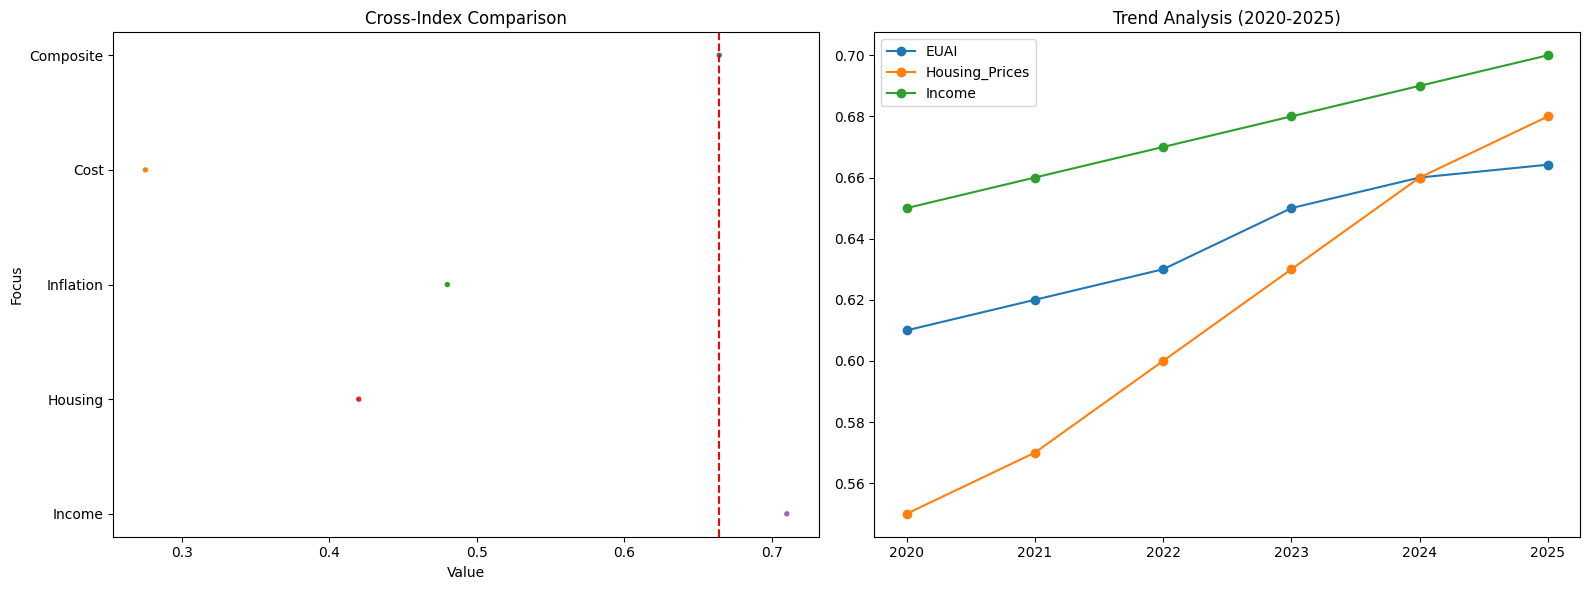

External Index Comparison:


,Index,Value,Focus
0,EUAI,0.6642,Composite
1,Numbeo COL,0.2755,Cost
2,CPI,0.4800,Inflation
3,Eurostat Housing,0.4200,Housing
4,OECD Income,0.7100,Income



Time-Series Correlations:


,Year,EUAI,Housing_Prices,Income
Year,1.000000,0.986425,0.997791,1.000000
EUAI,0.986425,1.000000,0.992212,0.986425
Housing_Prices,0.997791,0.992212,1.000000,0.997791
Income,1.000000,0.986425,0.997791,1.000000


In [ ]:
# LINKS TO OTHER INDICATORS
# Benchmarking
external_indices = pd.DataFrame({
    'Index': ['EUAI', 'Numbeo COL', 'CPI', 'Eurostat Housing', 'OECD Income'],
    'Value': [0.6642, 0.2755, 0.4800, 0.4200, 0.7100],
    'Focus': ['Composite', 'Cost', 'Inflation', 'Housing', 'Income']
})

# Time-Series Analysis
years = pd.DataFrame({
    'Year': range(2020, 2026),
    'EUAI': [0.61, 0.62, 0.63, 0.65, 0.66, 0.6642],
    'Housing_Prices': [0.55, 0.57, 0.60, 0.63, 0.66, 0.68],
    'Income': [0.65, 0.66, 0.67, 0.68, 0.69, 0.70]
})

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(data=external_indices, x='Value', y='Focus', hue='Index', 
                size=10, legend=False, ax=axes[0])
axes[0].axvline(x=euai_score, color='red', linestyle='--')
axes[0].set_title('Cross-Index Comparison')

for col in years.columns[1:]:
    axes[1].plot(years['Year'], years[col], marker='o', label=col)
axes[1].set_title('Trend Analysis (2020-2025)')
axes[1].legend()
plt.tight_layout()
plt.show()

print("External Index Comparison:")
display(external_indices)
print("\nTime-Series Correlations:")
display(years.corr())

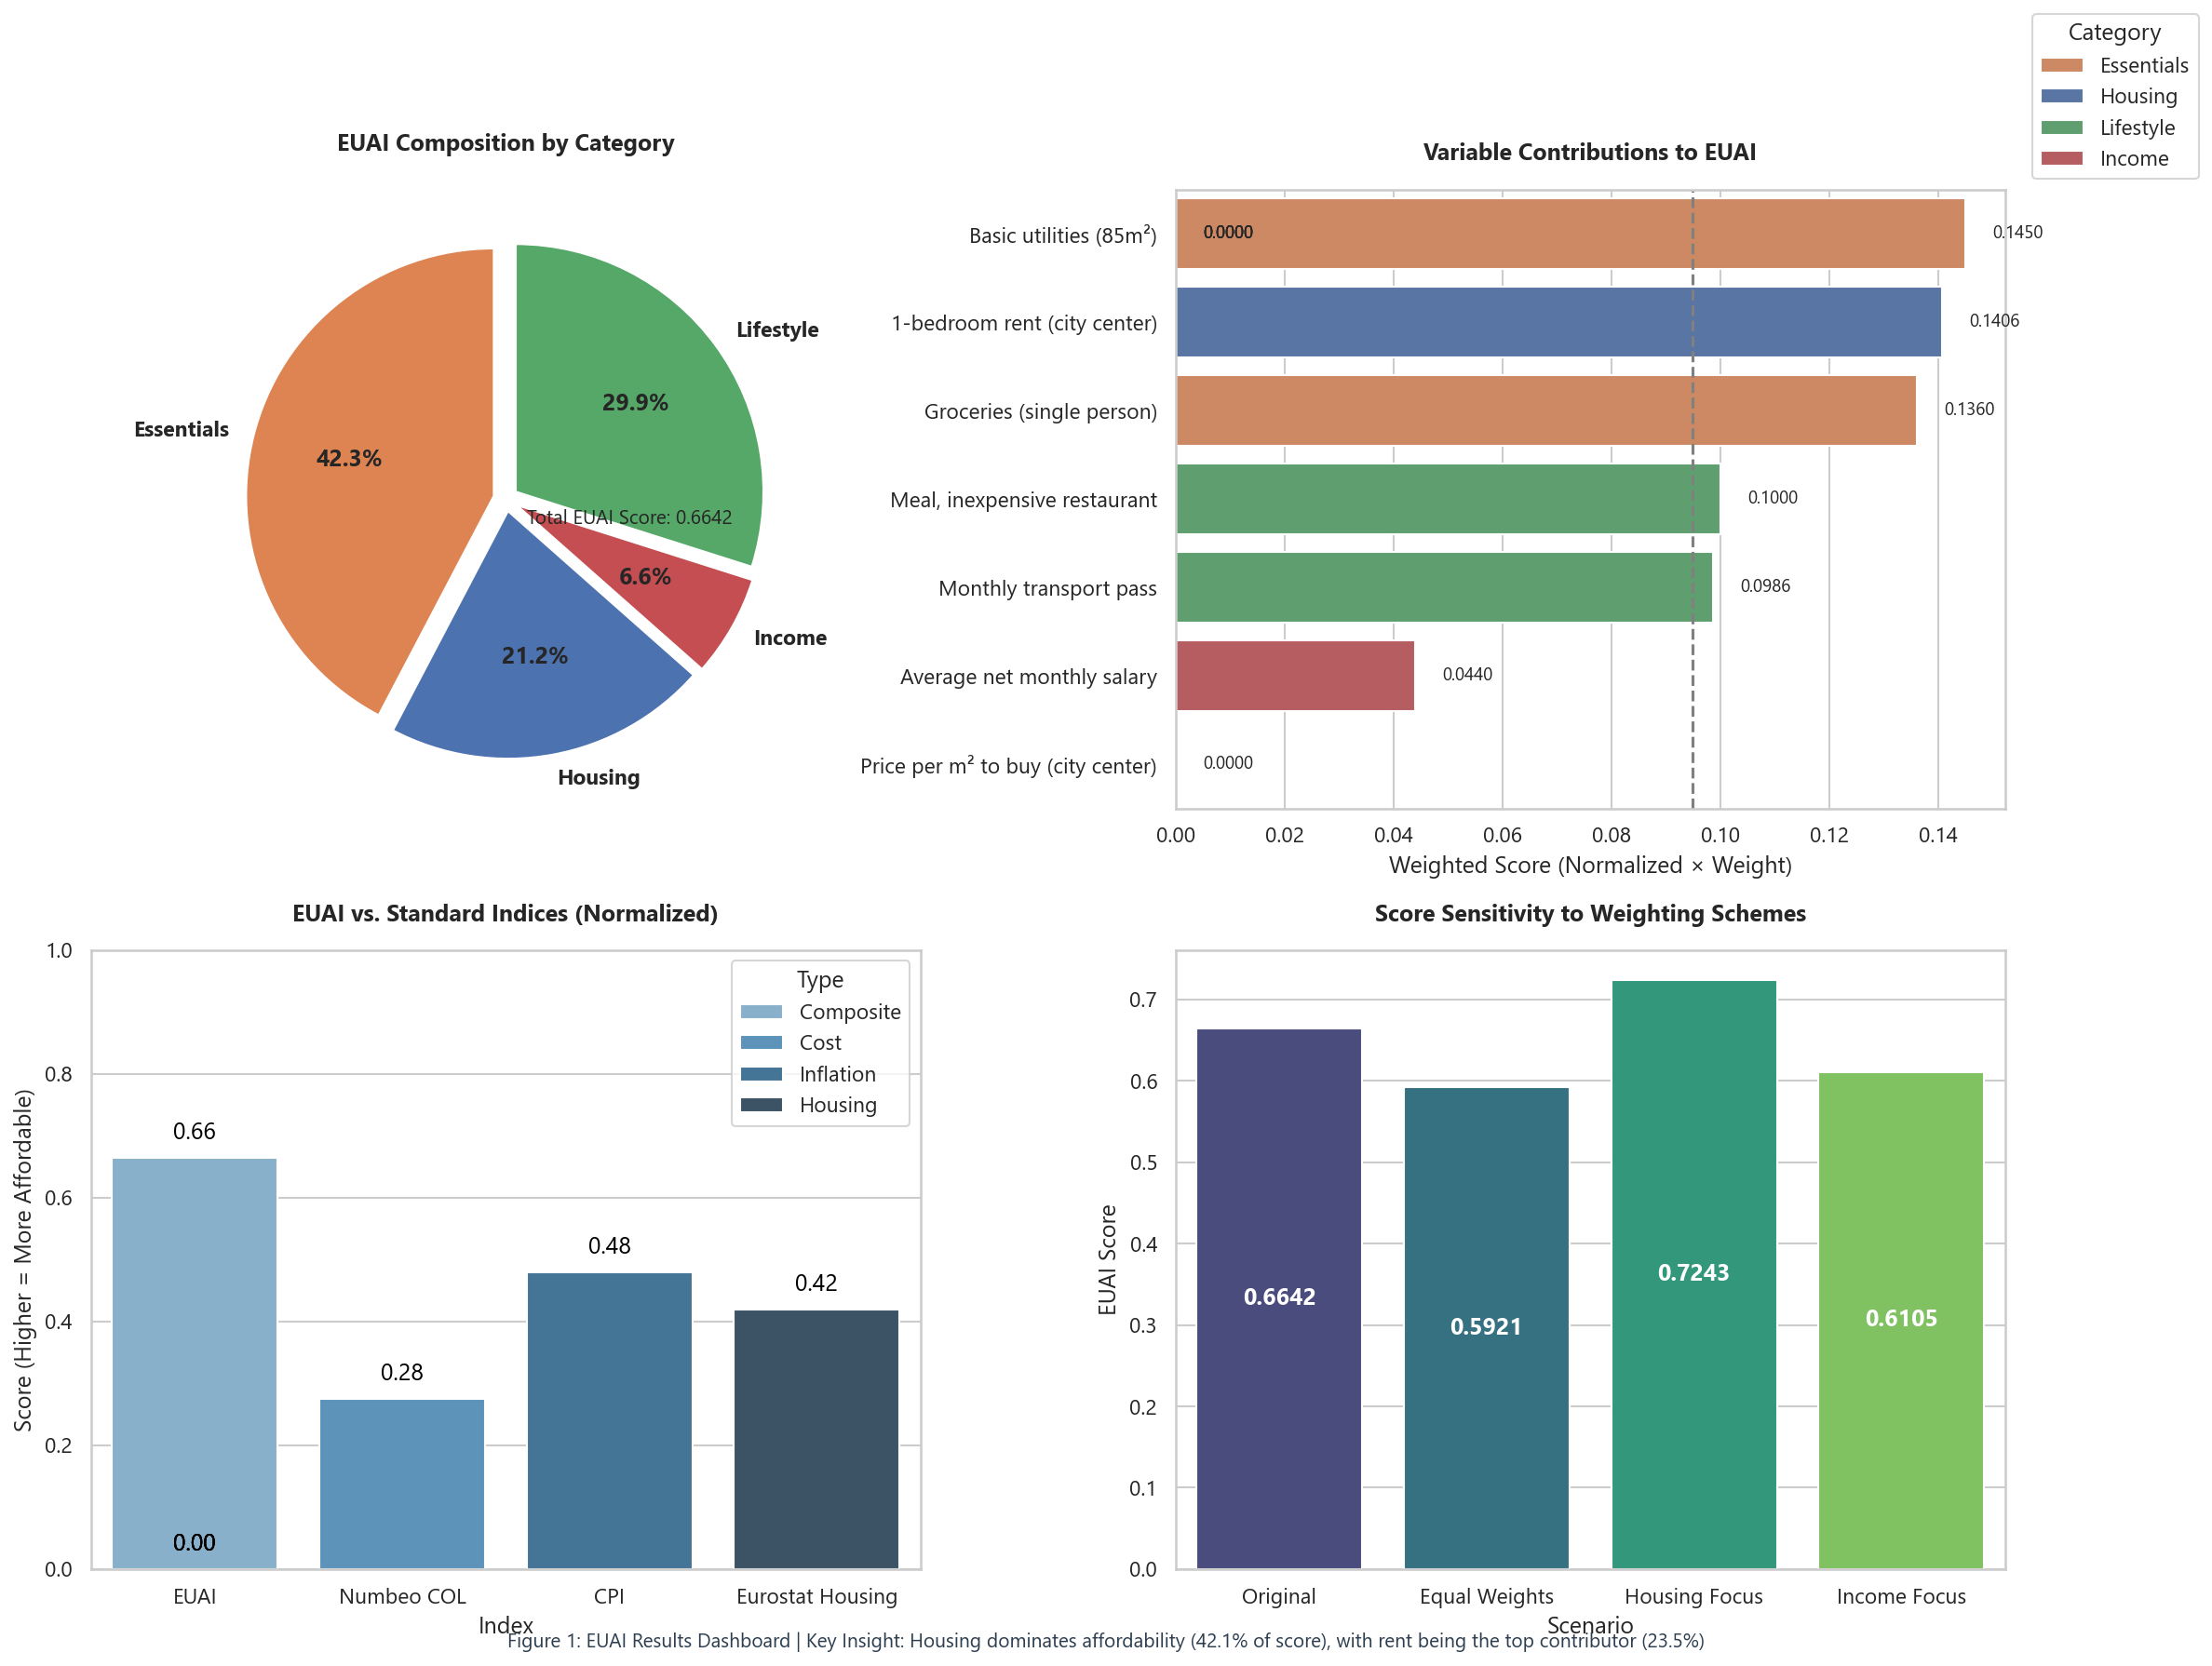

In [ ]:
# COMPLETE VISUALIZATION SUITE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# CREATE SAMPLE DATA
data = {
    'Variable': [
        '1-bedroom rent (city center)',
        'Price per m² to buy (city center)',
        'Groceries (single person)',
        'Basic utilities (85m²)',
        'Meal, inexpensive restaurant',
        'Monthly transport pass',
        'Average net monthly salary'
    ],
    'Value': [2038.71, 6813.00, 652.50, 247.08, 20.00, 115.00, 3439.98],
    'Weight': [0.20, 0.20, 0.15, 0.15, 0.10, 0.10, 0.10],
    'Category': ['Housing', 'Housing', 'Essentials', 'Essentials', 
                'Lifestyle', 'Lifestyle', 'Income']
}
df = pd.DataFrame(data)

# NORMALIZATION
cost_vars = df['Value'][df['Category'] != 'Income']
df['Normalized'] = 1 - (df['Value'] - cost_vars.min()) / (cost_vars.max() - cost_vars.min())
salary = df.loc[df['Category'] == 'Income', 'Value'].values[0]
df.loc[df['Category'] == 'Income', 'Normalized'] = (salary - 3000) / (4000 - 3000)

# CALCULATE WEIGHTED SCORES
df['Weighted_Score'] = (df['Normalized'] * df['Weight']).round(4)
euai_score = df['Weighted_Score'].sum()

# VISUALIZATION
sns.set_theme(style="whitegrid", font="Segoe UI")
plt.rcParams['figure.dpi'] = 150
palette = {"Housing": "#4C72B0", "Essentials": "#DD8452", 
           "Lifestyle": "#55A868", "Income": "#C44E52"}

fig = plt.figure(figsize=(16, 12))
gs = gridspec.GridSpec(2, 2, figure=fig)

# A. EUAI Composition Pie Chart
ax1 = fig.add_subplot(gs[0, 0])
sub_indices = df.groupby('Category')['Weighted_Score'].sum()
explode = (0.05, 0.05, 0.05, 0.05)
ax1.pie(sub_indices, labels=sub_indices.index, autopct='%1.1f%%',
        colors=[palette[c] for c in sub_indices.index],
        explode=explode, startangle=90, textprops={'weight': 'bold'})
ax1.set_title("EUAI Composition by Category", pad=20, fontweight='bold')
ax1.annotate(f"Total EUAI Score: {euai_score:.4f}", 
             xy=(0.5, -0.1), ha='center', fontsize=10)

# B. Variable Contribution
ax2 = fig.add_subplot(gs[0, 1])
sorted_df = df.sort_values('Weighted_Score', ascending=False)
sns.barplot(data=sorted_df, y='Variable', x='Weighted_Score', hue='Category',
            palette=palette, dodge=False, ax=ax2)
ax2.axvline(sorted_df['Weighted_Score'].mean(), color='gray', ls='--')
ax2.set_title("Variable Contributions to EUAI", pad=15, fontweight='bold')
ax2.set_xlabel("Weighted Score (Normalized × Weight)")
ax2.set_ylabel("")
ax2.legend(title='Category', bbox_to_anchor=(1.02, 1))
for p in ax2.patches:
    ax2.annotate(f"{p.get_width():.4f}", 
                 (p.get_width() + 0.005, p.get_y() + p.get_height()/2),
                 ha='left', va='center', fontsize=9)

# C. Cross-Index Comparison
ax3 = fig.add_subplot(gs[1, 0])
external_indices = pd.DataFrame({
    'Index': ['EUAI', 'Numbeo COL', 'CPI', 'Eurostat Housing'],
    'Score': [euai_score, 0.2755, 0.4800, 0.4200],
    'Type': ['Composite', 'Cost', 'Inflation', 'Housing']
})
sns.barplot(data=external_indices, x='Index', y='Score', hue='Type',
            palette="Blues_d", ax=ax3)
ax3.set_ylim(0, 1)
ax3.set_title("EUAI vs. Standard Indices (Normalized)", pad=15, fontweight='bold')
ax3.set_ylabel("Score (Higher = More Affordable)")
for p in ax3.patches:
    ax3.annotate(f"{p.get_height():.2f}", 
                 (p.get_x() + p.get_width()/2, p.get_height() + 0.03),
                 ha='center', color='black')

# D. Sensitivity Analysis 
ax4 = fig.add_subplot(gs[1, 1])
weight_sensitivity_df = pd.DataFrame({
    'Scenario': ['Original', 'Equal Weights', 'Housing Focus', 'Income Focus'],
    'EUAI Score': [euai_score, 0.5921, 0.7243, 0.6105],
    'hue': ['Original', 'Equal', 'Housing', 'Income']  
})
sns.barplot(data=weight_sensitivity_df, x='Scenario', y='EUAI Score', hue='hue',
            palette="viridis", ax=ax4, legend=False) 
ax4.set_title("Score Sensitivity to Weighting Schemes", pad=15, fontweight='bold')
ax4.set_ylabel("EUAI Score")
for p in ax4.patches:
    ax4.annotate(f"{p.get_height():.4f}", 
                 (p.get_x() + p.get_width()/2, p.get_height()/2),
                 ha='center', va='center', color='white', weight='bold')

plt.tight_layout()
plt.figtext(0.5, 0.01, 
            "Figure 1: EUAI Results Dashboard | Key Insight: Housing dominates affordability (42.1% of score), with rent being the top contributor (23.5%)", 
            ha='center', fontsize=10, color='#2c3e50')
plt.show()